## data

In [45]:
import pandas as pd
import numpy as np

In [94]:
df_blog_title = pd.read_csv("data_tour_NLP_train.csv")
df_blog_title

,_id,concept,season,review_text,지역,review_text_clean
0,65ee6316a64dee66ed301e2a,0,0,[블로그 울산 남구 아이스팩 전용 수거함 어디에 있을까?,울산,아이스팩 전용 수거
1,65ee670ba64dee66ed303175,5,3,[가을여행] 전주 당일치기 여행 BEST10 (feat. 덕진공원팸투어) /가을 단...,전북,가을 전주 당일치기 진공 투어 가을 단풍
2,65ee6a64c528b55b0ae79e58,4,0,"대전 유성구 관평동 맛집, 감동적인 맛과 가격 '매봉 쌀국수와 소바'",대전,맛집 감동 쌀국수
3,65ee60fc901db79521bc991b,3,0,역사를 따라가는 DMZ 로드,경기,역사 로드
4,65ee664fc528b55b0ae78d7a,5,0,"아브라다카브라라는 주문을 외워보고 싶은, '대전 보라매공원크리스마스 풍경'",대전,주문 보라매 공원 풍경
...,...,...,...,...,...,...
9995,65ee9b78c27eda916fc74ead,5,-,서귀포 추천 여행지 신창풍차해안도로,제주,풍차 해안 도로
9996,65ee66b6901db79521bcb1d6,4,-,"반려견과 함께 하는 커피 한 잔, 광주 애견동반카페 모음.ZIP",광주,반려견 커피 애견 동반
9997,65ee6722a64dee66ed3032ef,1,-,전북 문화공간 - 완주 복합문화지구 누에(Nu-e),전북,문화 공간 복합 문화 지구 누에
9998,65ee6cd5c528b55b0ae7a7b4,5,-,"벚꽃은 갔지만 유채꽃 만발, 서울에서 만나는 남해",서울,벚꽃 유채꽃 만발


## 자연어처리

In [95]:
# 숫자 삭제
df_blog_title['review_preprocess'] = df_blog_title['review_text'].str.replace('[0-9]','',regex=True)

In [49]:
!pip install python-mecab-ko

In [96]:
from mecab import MeCab
mecab = MeCab()

In [97]:
mecab.pos(df_blog_title['review_preprocess'][9996])

[('반려', 'NNG'),
 ('견과', 'NNG'),
 ('함께', 'MAG'),
 ('하', 'VV'),
 ('는', 'ETM'),
 ('커피', 'NNG'),
 ('한', 'MM'),
 ('잔', 'NNBC'),
 (',', 'SC'),
 ('광주', 'NNP'),
 ('애견', 'NNG'),
 ('동반', 'NNG'),
 ('카페', 'NNG'),
 ('모음', 'NNG'),
 ('.', 'SY'),
 ('ZIP', 'SL')]

In [151]:
def mecab_tag(text):
    morphs_nouns = []
    morphs_nouns_list = []
    for sentence in text:
        morphs = [morph for morph, tag in mecab.pos(sentence) if tag in ['NNG', 'NNB', 'NNBC', 'NP', 'NR']]
        words = [word for morphs in morphs for word in morphs.split()]
        cleaned_words = [word for word in words if word not in ['만', '곳', '블로그']]
        morphs_nouns.append(' '.join(cleaned_words))
        # morphs_nouns_list = morphs_nouns_list + morphs
    
    return morphs_nouns

In [153]:
morphs_nouns = mecab_tag(df_blog_title['review_preprocess'])

In [154]:
df_blog_title["review_clean"] = morphs_nouns

In [155]:
df_blog_title

,_id,concept,season,review_text,지역,review_text_clean,review_preprocess,review_clean
0,65ee6316a64dee66ed301e2a,0,0,[블로그 울산 남구 아이스팩 전용 수거함 어디에 있을까?,울산,아이스팩 전용 수거,[블로그 울산 남구 아이스팩 전용 수거함 어디에 있을까?,남구 아이스 전용 수거 어디
1,65ee670ba64dee66ed303175,5,3,[가을여행] 전주 당일치기 여행 BEST10 (feat. 덕진공원팸투어) /가을 단...,전북,가을 전주 당일치기 진공 투어 가을 단풍,[가을여행] 전주 당일치기 여행 BEST (feat. 덕진공원팸투어) /가을 단풍 ...,가을 여행 전주 당일치기 여행 공원 팸 투어 가을 단풍 여행지 추천
2,65ee6a64c528b55b0ae79e58,4,0,"대전 유성구 관평동 맛집, 감동적인 맛과 가격 '매봉 쌀국수와 소바'",대전,맛집 감동 쌀국수,"대전 유성구 관평동 맛집, 감동적인 맛과 가격 '매봉 쌀국수와 소바'",맛집 감동 맛 가격 쌀국수
3,65ee60fc901db79521bc991b,3,0,역사를 따라가는 DMZ 로드,경기,역사 로드,역사를 따라가는 DMZ 로드,역사 로드
4,65ee664fc528b55b0ae78d7a,5,0,"아브라다카브라라는 주문을 외워보고 싶은, '대전 보라매공원크리스마스 풍경'",대전,주문 보라매 공원 풍경,"아브라다카브라라는 주문을 외워보고 싶은, '대전 보라매공원크리스마스 풍경'",주문 보라매 공원 풍경
...,...,...,...,...,...,...,...,...
9995,65ee9b78c27eda916fc74ead,5,-,서귀포 추천 여행지 신창풍차해안도로,제주,풍차 해안 도로,서귀포 추천 여행지 신창풍차해안도로,서귀포 추천 여행지 풍차 해안도
9996,65ee66b6901db79521bcb1d6,4,-,"반려견과 함께 하는 커피 한 잔, 광주 애견동반카페 모음.ZIP",광주,반려견 커피 애견 동반,"반려견과 함께 하는 커피 한 잔, 광주 애견동반카페 모음.ZIP",반려 견과 커피 잔 애견 동반 카페 모음
9997,65ee6722a64dee66ed3032ef,1,-,전북 문화공간 - 완주 복합문화지구 누에(Nu-e),전북,문화 공간 복합 문화 지구 누에,전북 문화공간 - 완주 복합문화지구 누에(Nu-e),완주 복합 문화 지구 누에
9998,65ee6cd5c528b55b0ae7a7b4,5,-,"벚꽃은 갔지만 유채꽃 만발, 서울에서 만나는 남해",서울,벚꽃 유채꽃 만발,"벚꽃은 갔지만 유채꽃 만발, 서울에서 만나는 남해",벚꽃 유채 꽃 만발 남


## 워드클라우드

- 제주, 대전, 울산, 대구, 서울

In [156]:
review_text_jeju = df_blog_title.query('지역 == "제주"')["review_clean"].tolist()
review_text_daejeon = df_blog_title.query('지역 == "대전"')["review_clean"].tolist()
review_text_ulsan = df_blog_title.query('지역 == "울산"')["review_clean"].tolist()
review_text_daegu = df_blog_title.query('지역 == "대구"')["review_clean"].tolist()
review_text_seoul = df_blog_title.query('지역 == "서울"')["review_clean"].tolist()

In [157]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [158]:
from wordcloud import WordCloud
from collections import Counter

### 제주

In [159]:
text_split = [word for text in review_text_jeju for word in text.split()]
text_split_count = Counter(text_split)

wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(text_split_count)

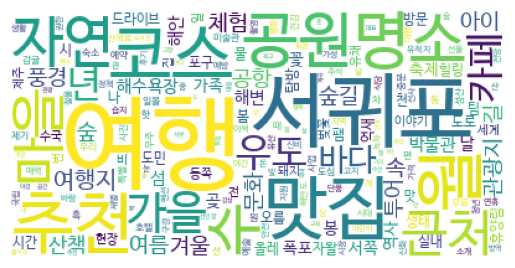

In [161]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

### 대전

In [162]:
text_split = [word for text in review_text_daejeon for word in text.split()]
text_split_count = Counter(text_split)

wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(text_split_count)

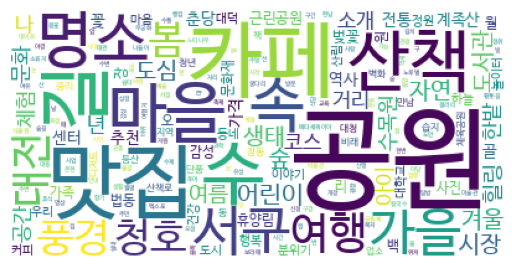

In [163]:
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

### 울산

In [164]:
text_split = [word for text in review_text_ulsan for word in text.split()]
text_split_count = Counter(text_split)

wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(text_split_count)

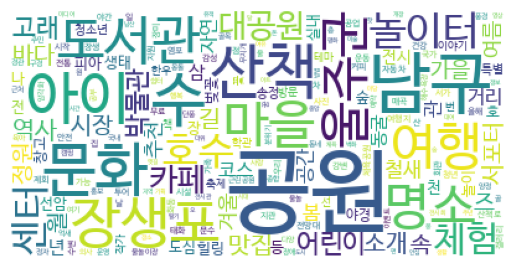

In [165]:
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

### 대구

In [166]:
text_split = [word for text in review_text_daegu for word in text.split()]
text_split_count = Counter(text_split)

wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(text_split_count)

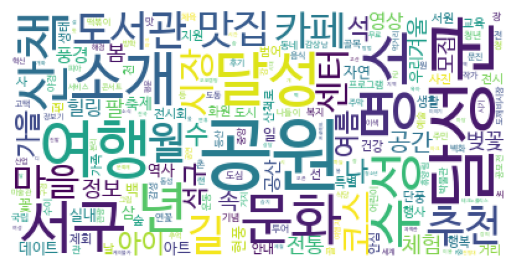

In [167]:
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

### 서울

In [168]:
text_split = [word for text in review_text_seoul for word in text.split()]
text_split_count = Counter(text_split)

wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(text_split_count)

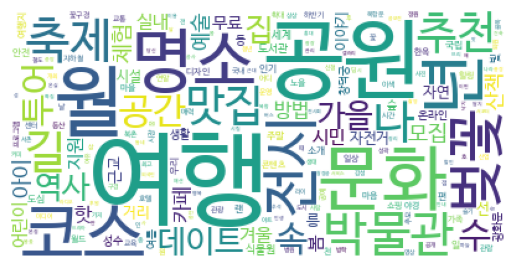

In [169]:
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

## LDA

In [197]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

### 제주

In [198]:
# 텍스트 데이터 전처리 및 벡터화
vectorizer = TfidfVectorizer()
feature_jeju = vectorizer.fit_transform(df_blog_title.query('지역 == "제주"')['review_clean'])

In [199]:
# LDA 모델 훈련
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda .fit(feature_jeju)

LatentDirichletAllocation(n_components=5, random_state=42)

In [200]:
# 훈련된 LDA 모델로 문서별 토픽 할당
document_topics = lda.transform(feature_jeju)

# 각 문서의 주요 토픽 확인
for idx, topic in enumerate(document_topics):
    print(f"Document {idx} belongs to Topic {topic.argmax()}")

Document 0 belongs to Topic 3
Document 1 belongs to Topic 1
Document 2 belongs to Topic 3
Document 3 belongs to Topic 0
Document 4 belongs to Topic 1
Document 5 belongs to Topic 3
Document 6 belongs to Topic 1
Document 7 belongs to Topic 4
Document 8 belongs to Topic 3
Document 9 belongs to Topic 2
Document 10 belongs to Topic 3
Document 11 belongs to Topic 0
Document 12 belongs to Topic 4
Document 13 belongs to Topic 0
Document 14 belongs to Topic 2
Document 15 belongs to Topic 3
Document 16 belongs to Topic 1
Document 17 belongs to Topic 0
Document 18 belongs to Topic 0
Document 19 belongs to Topic 4
Document 20 belongs to Topic 1
Document 21 belongs to Topic 2
Document 22 belongs to Topic 4
Document 23 belongs to Topic 2
Document 24 belongs to Topic 3
Document 25 belongs to Topic 1
Document 26 belongs to Topic 3
Document 27 belongs to Topic 1
Document 28 belongs to Topic 1
Document 29 belongs to Topic 3
Document 30 belongs to Topic 4
Document 31 belongs to Topic 1
Document 32 belong

In [201]:
# 토픽 모델링 결과 해석
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    # 토픽별로 상위 단어 10개 출력
    top_word_indices = topic.argsort()[:-10-1:-1]
    top_words = [feature_names[i] for i in top_word_indices if i < len(feature_names)]
    print(f"Topic {topic_idx}: {', '.join(top_words)}")

Topic 0: 서귀포, 관광지, 여행, 맛집, 아이, 풍경, 매력, 실내, 서쪽, 제주
Topic 1: 숲길, 박물관, 해수욕장, 산책, 공원, 공항, 서귀포, 감귤, 우주, 근처
Topic 2: 여행, 맛집, 사진, 일몰, 명소, 가을, 돼지, 축제, 코스, 투어
Topic 3: 여행, 코스, 추천, 명소, 우도, 여행지, 겨울, 해안, 여름, 드라이브
Topic 4: 자연, 마을, 문화, 휴양림, 역사, 공원, 유적지, 방문, 체험, 세계


### 대전

In [202]:
# 텍스트 데이터 전처리 및 벡터화
vectorizer = TfidfVectorizer()
feature_daejeon = vectorizer.fit_transform(df_blog_title.query('지역 == "대전"')['review_clean'])
# LDA 모델 훈련
ldaPmodel = LatentDirichletAllocation(n_components=5, random_state=42)
ldaPmodel.fit(feature_daejeon)

LatentDirichletAllocation(n_components=5, random_state=42)

In [203]:
# 훈련된 LDA 모델로 문서별 토픽 할당
document_topics = ldaPmodel.transform(feature_daejeon)

# 각 문서의 주요 토픽 확인
for idx, topic in enumerate(document_topics):
    print(f"Document {idx} belongs to Topic {topic.argmax()}")

Document 0 belongs to Topic 3
Document 1 belongs to Topic 2
Document 2 belongs to Topic 3
Document 3 belongs to Topic 2
Document 4 belongs to Topic 3
Document 5 belongs to Topic 1
Document 6 belongs to Topic 0
Document 7 belongs to Topic 4
Document 8 belongs to Topic 0
Document 9 belongs to Topic 1
Document 10 belongs to Topic 1
Document 11 belongs to Topic 2
Document 12 belongs to Topic 1
Document 13 belongs to Topic 3
Document 14 belongs to Topic 1
Document 15 belongs to Topic 4
Document 16 belongs to Topic 1
Document 17 belongs to Topic 1
Document 18 belongs to Topic 2
Document 19 belongs to Topic 2
Document 20 belongs to Topic 0
Document 21 belongs to Topic 4
Document 22 belongs to Topic 0
Document 23 belongs to Topic 4
Document 24 belongs to Topic 2
Document 25 belongs to Topic 4
Document 26 belongs to Topic 2
Document 27 belongs to Topic 3
Document 28 belongs to Topic 3
Document 29 belongs to Topic 2
Document 30 belongs to Topic 3
Document 31 belongs to Topic 3
Document 32 belong

In [204]:
# 토픽 모델링 결과 해석
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    # 토픽별로 상위 단어 10개 출력
    top_word_indices = topic.argsort()[:-10-1:-1]
    top_words = [feature_names[i] for i in top_word_indices if i < len(feature_names)]
    print(f"Topic {topic_idx}: {', '.join(top_words)}")

Topic 0: 연두, 국공립, 종주, 배롱나무, 전광석화, 버스, 장면, 영산홍, 환경
Topic 1: 이곳, 삼림욕, 암석원, 구간, 구민, 연두, 감지, 초여름, 꿀맛
Topic 2: 종주, 배롱나무, 아메리칸, 트리, 보석, 가을밤, 모집
Topic 3: 종주, 보석, 체험, 주말, 경험, 조정, 무료
Topic 4: 포장, 발대식, 브리지, 주목, 구간, 코스, 서원, 완공


### 울산

In [211]:
# 텍스트 데이터 전처리 및 벡터화
vectorizer = TfidfVectorizer()
feature_ulsan = vectorizer.fit_transform(df_blog_title.query('지역 == "울산"')['review_clean'])
# LDA 모델 훈련
ldaPmodel = LatentDirichletAllocation(n_components=5, random_state=42)
ldaPmodel.fit(feature_ulsan)

LatentDirichletAllocation(n_components=5, random_state=42)

In [212]:
# 훈련된 LDA 모델로 문서별 토픽 할당
document_topics = ldaPmodel.transform(feature_ulsan)

# 각 문서의 주요 토픽 확인
for idx, topic in enumerate(document_topics):
    print(f"Document {idx} belongs to Topic {topic.argmax()}")

Document 0 belongs to Topic 3
Document 1 belongs to Topic 0
Document 2 belongs to Topic 1
Document 3 belongs to Topic 2
Document 4 belongs to Topic 2
Document 5 belongs to Topic 0
Document 6 belongs to Topic 3
Document 7 belongs to Topic 0
Document 8 belongs to Topic 0
Document 9 belongs to Topic 4
Document 10 belongs to Topic 0
Document 11 belongs to Topic 0
Document 12 belongs to Topic 1
Document 13 belongs to Topic 3
Document 14 belongs to Topic 4
Document 15 belongs to Topic 0
Document 16 belongs to Topic 0
Document 17 belongs to Topic 3
Document 18 belongs to Topic 0
Document 19 belongs to Topic 0
Document 20 belongs to Topic 0
Document 21 belongs to Topic 0
Document 22 belongs to Topic 4
Document 23 belongs to Topic 4
Document 24 belongs to Topic 0
Document 25 belongs to Topic 0
Document 26 belongs to Topic 0
Document 27 belongs to Topic 0
Document 28 belongs to Topic 2
Document 29 belongs to Topic 3
Document 30 belongs to Topic 4
Document 31 belongs to Topic 0
Document 32 belong

In [213]:
# 토픽 모델링 결과 해석
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    # 토픽별로 상위 단어 10개 출력
    top_word_indices = topic.argsort()[:-10-1:-1]
    top_words = [feature_names[i] for i in top_word_indices if i < len(feature_names)]
    print(f"Topic {topic_idx}: {', '.join(top_words)}")

Topic 0: 정서, 나기, 휴장, 서예, 하화, 선거전, 포토, 제호
Topic 1: 치매, 신체, 작소, 기업, 기차, 정서, 개장, 대동
Topic 2: 휴장, 서예, 일자리, 소금, 갈치, 뷔페
Topic 3: 휴장, 소금, 히든, 공예, 회화나무, 빙상
Topic 4: 새별, 숲길, 기업, 애서, 지역


### 대구

In [214]:
# 텍스트 데이터 전처리 및 벡터화
vectorizer = TfidfVectorizer()
feature_daegu = vectorizer.fit_transform(df_blog_title.query('지역 == "대구"')['review_clean'])
# LDA 모델 훈련
ldaPmodel = LatentDirichletAllocation(n_components=5, random_state=42)
ldaPmodel.fit(feature_daegu)

LatentDirichletAllocation(n_components=5, random_state=42)

In [215]:
# 훈련된 LDA 모델로 문서별 토픽 할당
document_topics = ldaPmodel.transform(feature_daegu)

# 각 문서의 주요 토픽 확인
for idx, topic in enumerate(document_topics):
    print(f"Document {idx} belongs to Topic {topic.argmax()}")

Document 0 belongs to Topic 4
Document 1 belongs to Topic 4
Document 2 belongs to Topic 0
Document 3 belongs to Topic 3
Document 4 belongs to Topic 3
Document 5 belongs to Topic 4
Document 6 belongs to Topic 0
Document 7 belongs to Topic 0
Document 8 belongs to Topic 3
Document 9 belongs to Topic 1
Document 10 belongs to Topic 4
Document 11 belongs to Topic 1
Document 12 belongs to Topic 1
Document 13 belongs to Topic 0
Document 14 belongs to Topic 0
Document 15 belongs to Topic 3
Document 16 belongs to Topic 3
Document 17 belongs to Topic 0
Document 18 belongs to Topic 3
Document 19 belongs to Topic 3
Document 20 belongs to Topic 3
Document 21 belongs to Topic 0
Document 22 belongs to Topic 3
Document 23 belongs to Topic 4
Document 24 belongs to Topic 3
Document 25 belongs to Topic 3
Document 26 belongs to Topic 1
Document 27 belongs to Topic 1
Document 28 belongs to Topic 2
Document 29 belongs to Topic 0
Document 30 belongs to Topic 0
Document 31 belongs to Topic 4
Document 32 belong

In [216]:
# 토픽 모델링 결과 해석
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    # 토픽별로 상위 단어 10개 출력
    top_word_indices = topic.argsort()[:-10-1:-1]
    top_words = [feature_names[i] for i in top_word_indices if i < len(feature_names)]
    print(f"Topic {topic_idx}: {', '.join(top_words)}")

Topic 0: 운수, 그림책, 콤플렉스, 복수초, 참살, 봄꽃, 지역민, 원화
Topic 1: 전쟁, 선생, 영양, 군립, 규모, 운수, 개막, 한정판, 노동자
Topic 2: 콤플렉스, 복수초, 여자, 불화, 가회, 미술관
Topic 3: 콤플렉스, 불화, 한눈, 큐레이션, 고봉, 캠페인, 바닐라
Topic 4: 변모, 산새, 타보, 군립, 혼자, 소리, 이상


### 서울

In [217]:
# 텍스트 데이터 전처리 및 벡터화
vectorizer = TfidfVectorizer()
feature_seoul = vectorizer.fit_transform(df_blog_title.query('지역 == "서울"')['review_clean'])
# LDA 모델 훈련
ldaPmodel = LatentDirichletAllocation(n_components=5, random_state=42)
ldaPmodel.fit(feature_seoul)

LatentDirichletAllocation(n_components=5, random_state=42)

In [218]:
# 훈련된 LDA 모델로 문서별 토픽 할당
document_topics = ldaPmodel.transform(feature_seoul)

# 각 문서의 주요 토픽 확인
for idx, topic in enumerate(document_topics):
    print(f"Document {idx} belongs to Topic {topic.argmax()}")

Document 0 belongs to Topic 1
Document 1 belongs to Topic 4
Document 2 belongs to Topic 4
Document 3 belongs to Topic 3
Document 4 belongs to Topic 4
Document 5 belongs to Topic 3
Document 6 belongs to Topic 3
Document 7 belongs to Topic 2
Document 8 belongs to Topic 2
Document 9 belongs to Topic 0
Document 10 belongs to Topic 0
Document 11 belongs to Topic 0
Document 12 belongs to Topic 0
Document 13 belongs to Topic 3
Document 14 belongs to Topic 0
Document 15 belongs to Topic 2
Document 16 belongs to Topic 4
Document 17 belongs to Topic 2
Document 18 belongs to Topic 1
Document 19 belongs to Topic 0
Document 20 belongs to Topic 4
Document 21 belongs to Topic 2
Document 22 belongs to Topic 1
Document 23 belongs to Topic 4
Document 24 belongs to Topic 4
Document 25 belongs to Topic 0
Document 26 belongs to Topic 4
Document 27 belongs to Topic 4
Document 28 belongs to Topic 1
Document 29 belongs to Topic 1
Document 30 belongs to Topic 0
Document 31 belongs to Topic 0
Document 32 belong

In [219]:
# 토픽 모델링 결과 해석
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    # 토픽별로 상위 단어 10개 출력
    top_word_indices = topic.argsort()[:-10-1:-1]
    top_words = [feature_names[i] for i in top_word_indices if i < len(feature_names)]
    print(f"Topic {topic_idx}: {', '.join(top_words)}")

Topic 0: 대중, 운영, 위주
Topic 1: 지원금, 담장, 대공원, 건축, 만남
Topic 2: 운영, 인기, 감탄, 안심
Topic 3: 인기, 구로, 양재
Topic 4: 오픈, 전시, 담장, 최고


## 분석

제주
- Topic 0 서귀포, 관광지, 여행, 맛집, 아이, 풍경, 매력, 실내, 서쪽, 제주
- Topic 1 숲길, 박물관, 해수욕장, 산책, 공원, 공항, 서귀포, 감귤, 우주, 근처
- Topic 2 여행, 맛집, 사진, 일몰, 명소, 가을, 돼지, 축제, 코스, 투어
- Topic 3 여행, 코스, 추천, 명소, 우도, 여행지, 겨울, 해안, 여름, 드라이브
- Topic 4 자연, 마을, 문화, 휴양림, 역사, 공원, 유적지, 방문, 체험, 세계

대전
- Topic 0: 연두, 국공립, 종주, 배롱나무, 전광석화, 버스, 장면, 영산홍, 환경
- Topic 1: 이곳, 삼림욕, 암석원, 구간, 구민, 연두, 감지, 초여름, 꿀맛
- Topic 2: 종주, 배롱나무, 아메리칸, 트리, 보석, 가을밤, 모집
- Topic 3: 종주, 보석, 체험, 주말, 경험, 조정, 무료
- Topic 4: 포장, 발대식, 브리지, 주목, 구간, 코스, 서원, 완공

울산
- Topic 0: 정서, 나기, 휴장, 서예, 하화, 선거전, 포토, 제호
- Topic 1: 치매, 신체, 작소, 기업, 기차, 정서, 개장, 대동
- Topic 2: 휴장, 서예, 일자리, 소금, 갈치, 뷔페
- Topic 3: 휴장, 소금, 히든, 공예, 회화나무, 빙상
- Topic 4: 새별, 숲길, 기업, 애서, 지역

대구
- Topic 0: 운수, 그림책, 콤플렉스, 복수초, 참살, 봄꽃, 지역민, 원화
- Topic 1: 전쟁, 선생, 영양, 군립, 규모, 운수, 개막, 한정판, 노동자
- Topic 2: 콤플렉스, 복수초, 여자, 불화, 가회, 미술관
- Topic 3: 콤플렉스, 불화, 한눈, 큐레이션, 고봉, 캠페인, 바닐라
- Topic 4: 변모, 산새, 타보, 군립, 혼자, 소리, 이상

서울 
- Topic 0: 대중, 운영, 위주
- Topic 1: 지원금, 담장, 대공원, 건축, 만남
- Topic 2: 운영, 인기, 감탄, 안심
- Topic 3: 인기, 구로, 양재
- Topic 4: 오픈, 전시, 담장, 최고